### 1.3.2 Arithmetic Operations on Images

In [2]:
import cv2
import numpy as np

In [16]:
def nothing(x):
    pass

In [3]:
x = np.uint8([250])
y = np.uint8([10])

In [4]:
print(x)

[250]


In [5]:
x+y # 이렇게 하면 연산 안됨

array([4], dtype=uint8)

In [6]:
cv2.add(x,y) #이미지 연산하는 방법

array([[255]], dtype=uint8)

In [17]:
def onChange(x):
    a = bl / 255.0
    b = 1 - a
    dst = cv2.addWeighted(img1,a,img2,b,0)
    cv2.imshow('dst',dst)

In [25]:
img1 = cv2.imread('333.jpg')
res1 = cv2.resize(img1, dsize=(800,600), interpolation=cv2.INTER_CUBIC)
img2 = cv2.imread('222.jpg')
res2 = cv2.resize(img2, dsize=(800,600), interpolation=cv2.INTER_CUBIC)


In [23]:
cv2.namedWindow('dst')
cv2.createTrackbar('Blend','dst',0,255,nothing) #noting -> onChange

while(1):

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    # get current positions of four trackbars
    
    bl = cv2.getTrackbarPos('Blend','dst')
    
    a = bl / 255.0
    b = 1 - a
    dst = cv2.addWeighted(img1,a,img2,b,0)

    cv2.imshow('dst',dst)
        
cv2.destroyAllWindows()

In [32]:
img1 = cv2.imread('222.jpg')
res1 = cv2.resize(img1, dsize=(800,600), interpolation=cv2.INTER_CUBIC)
img2 = cv2.imread('opencv2.png')
res2 = cv2.resize(img2, dsize=(800,600), interpolation=cv2.INTER_CUBIC)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = res2.shape
roi = res1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(res2,res2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
res1[0:rows, 0:cols ] = dst

cv2.imshow('res',res1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
from matplotlib import pyplot as plt

In [49]:
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [35]:
img1 = cv2.imread('222.jpg')
res1 = cv2.resize(img1, dsize=(800,600), interpolation=cv2.INTER_CUBIC)
img2 = cv2.imread('opencv2.png')
res2 = cv2.resize(img2, dsize=(800,600), interpolation=cv2.INTER_CUBIC)

In [36]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = res2.shape

print(rows,cols,channels)

600 800 3


In [37]:
roi = res1[0:rows, 0:cols ]

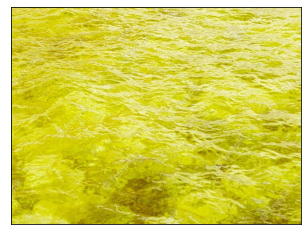

In [38]:
pltImage(res1)

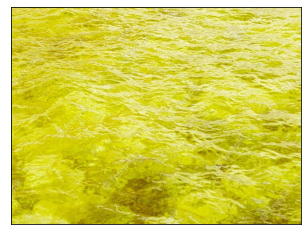

In [39]:
pltImage(roi)

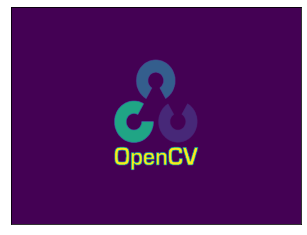

In [40]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)

pltImage(img2gray)

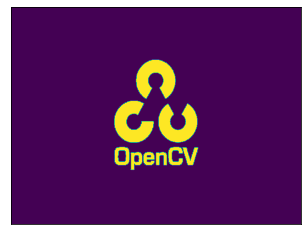

In [42]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
pltImage(mask)

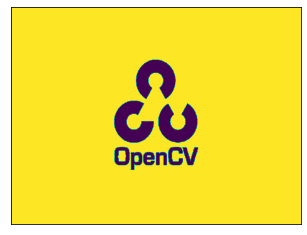

In [45]:
mask_inv = cv2.bitwise_not(mask)
pltImage(mask_inv)

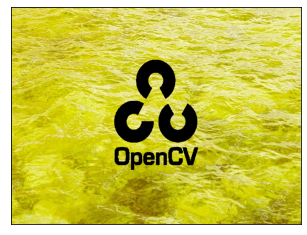

In [46]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
pltImage(img1_bg)

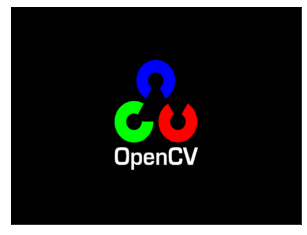

In [47]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(res2,res2,mask = mask)
pltImage(img2_fg)

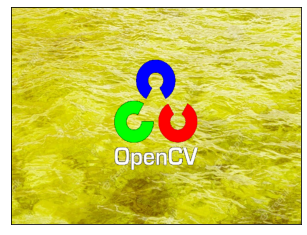

In [48]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
res1[0:rows, 0:cols ] = dst
pltImage(res1)